# Parsing Text and the LDA output

## a.1) Opening pdfs and extracting their text

Under the material for Lecture 3 I have added a folder called FOMC_pdf. This folder contains the transcripts of all the meetings that took place during the [Greenspan](https://en.wikipedia.org/wiki/Alan_Greenspan) era (August 11, 1987 to January 31st, 2006). 

We are some lines of code to parse those pdfs. 

In [39]:
#load operating system module

import os

This module is used to conduct operating system like tasks (such as opening a file, or listing the contents of a directory).

In [40]:
#Define the base directory containing the FOMC statements

base_directory = "../../../../collection/python/data/transcript_raw_text"

In [41]:
#Return a list containing the name of the files in the directory

raw_doc        = os.listdir(base_directory)

In [42]:
#Sort the list in ascending order

filelist       = sorted(raw_doc)

In [43]:
filelist

['1976-03-29.txt',
 '1976-04-20.txt',
 '1976-05-18.txt',
 '1976-06-22.txt',
 '1976-07-19.txt',
 '1976-08-17.txt',
 '1976-09-21.txt',
 '1976-10-19.txt',
 '1976-11-08.txt',
 '1976-11-16.txt',
 '1976-12-20.txt',
 '1977-01-17.txt',
 '1977-02-15.txt',
 '1977-03-15.txt',
 '1977-04-19.txt',
 '1977-05-17.txt',
 '1977-05-27.txt',
 '1977-06-21.txt',
 '1977-07-19.txt',
 '1977-08-16.txt',
 '1977-09-20.txt',
 '1977-10-17.txt',
 '1977-11-15.txt',
 '1977-12-19.txt',
 '1978-01-05.txt',
 '1978-01-17.txt',
 '1978-02-28.txt',
 '1978-03-10.txt',
 '1978-03-21.txt',
 '1978-04-18.txt',
 '1978-05-05.txt',
 '1978-05-16.txt',
 '1978-06-20.txt',
 '1978-07-18.txt',
 '1978-08-15.txt',
 '1978-09-19.txt',
 '1978-10-17.txt',
 '1978-11-21.txt',
 '1978-12-19.txt',
 '1979-02-06.txt',
 '1979-03-20.txt',
 '1979-04-17.txt',
 '1979-04-27.txt',
 '1979-05-22.txt',
 '1979-06-27.txt',
 '1979-07-11.txt',
 '1979-07-17.txt',
 '1979-07-19.txt',
 '1979-08-14.txt',
 '1979-09-18.txt',
 '1979-10-05.txt',
 '1979-10-06.txt',
 '1979-10-22

To parse the text in the pdfs I will use the PyPDF2 module (but there are other ways to do it. See for example the Tika module). 

Warning: Depending on your Python configuration, you might not be able to use PyPDF2 directly. I downloaded Python using the Anaconda distribution and I needed to type directly on the terminal

conda -forge pypdf2

After doing this, I was able to upload the PyPDF2 module

## a.2) Organizing the information in a data frame

In [44]:
import pandas as pd

In [24]:
#load re to split the content of the pdfs by the occurrence of a pattern

import re

In [25]:
#Creates a data frame containing the dates of the FOMC meetings

date        = pd.Series(data=filelist).apply(lambda x: x[4:12])

In [62]:
for i in range(len(document)):

    interjections    = re.split('MR. |MS. |CHAIRMAN |VICE CHAIRMAN ', document[i]) 
                        #Split the doc by interjections
    
    temp_df          = pd.DataFrame(columns=['Date','Speaker','content'],index=range(len(interjections)))          
                        #Temporary data frame
          
    for j in range(len(interjections)):
                                    
    
        interjection           = interjections[j].replace('\n',' ') 
                                 #Replace page break (\n) with space
        
        temp_df['Date'].loc[j]    = date[i]
           
        temp_df['Speaker'].loc[j] = interjection.split('.')[0]
        
        temp_df['content'].loc[j] = ''.join(interjection.split('.')[1:])
        
    parsed_text = pd.concat([parsed_text,temp_df],ignore_index=True)                     
            

In [63]:
parsed_text

,Date,Speaker,content
0,19870818,Meeting of the Federal Open Market CommitteeAu...,"C, on Tuesday, August 18, 1987, at 9:00 amPRE..."
1,19870818,JOHNSON,In the absence of the Vice Chairman of theFOM...
2,19870818,SEGER,And I'd like to second
3,19870818,JOHNSON,Are there any objections? [Laughter] MrChairman
4,19870818,GREENSPAN,That was a longer pause than I expected[Laugh...
5,19870818,SEGER,I'll move that
6,19870818,GREENSPAN,"If there are no objections, then theyare appr..."
7,19870818,CROSS,[Statement--see Appendix]
8,19870818,GREENSPAN,Comments anyone?
9,19870818,JOHNSON,"I have one, Mr Chairman I was looking thismor..."


We will focus only on Greenspan's interjections.

In [64]:
Greenspan_text = parsed_text.loc[parsed_text['Speaker'] == 'GREENSPAN']

In [65]:
Greenspan_text.index = range(sum(parsed_text['Speaker'] == 'GREENSPAN'))

In [66]:
Greenspan_text

,Date,Speaker,content
0,19870818,GREENSPAN,That was a longer pause than I expected[Laugh...
1,19870818,GREENSPAN,"If there are no objections, then theyare appr..."
2,19870818,GREENSPAN,Comments anyone?
3,19870818,GREENSPAN,To what extent is the general apparentreducti...
4,19870818,GREENSPAN,What happened to the DM this morning?
5,19870818,GREENSPAN,Anything else? May I have a motion toratify M...
6,19870818,GREENSPAN,"Without objection, they're approvedMr Sternli..."
7,19870818,GREENSPAN,Why don't we hold that until we getthrough th...
8,19870818,GREENSPAN,Further comments?
9,19870818,GREENSPAN,Anything else? I need ratification oftwo item...


## a.3) Bag of Words

In [67]:
Greenspan_corpus = list(Greenspan_text['content'])

In [74]:
len(Greenspan_corpus)

15927

In [89]:
Greenspan_corpus[0]

" That was a longer pause than I expected[Laughter] I'd like to entertain a motion to move the minutes"

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

In [91]:
vectorizer = CountVectorizer()

In [105]:
term_doc_matrix = vectorizer.fit_transform(Greenspan_corpus[0:1]).todense()

In [106]:
vectorizer.get_feature_names()

['entertain',
 'expected',
 'laughter',
 'like',
 'longer',
 'minutes',
 'motion',
 'move',
 'pause',
 'than',
 'that',
 'the',
 'to',
 'was']

In [107]:
term_doc_matrix

matrix([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1]], dtype=int64)

## a.4) Cloud of words

If you got the Anaconda distribution of Python go the terminal and type

conda install -c conda-forge wordcloud

Here is a good tutorial on how to generate words of clouds:

https://www.datacamp.com/community/tutorials/wordcloud-python

In [147]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white', font_step = 3, stopwords='None', relative_scaling=1).generate(Greenspan_text['content'].loc[0])


In [148]:
Greenspan_text['content'].loc[0]

" That was a longer pause than I expected[Laughter] I'd like to entertain a motion to move the minutes"

In [149]:
Greenspan_text.content[0]

" That was a longer pause than I expected[Laughter] I'd like to entertain a motion to move the minutes"

Display the generated image

In [150]:
import matplotlib.pyplot as plt

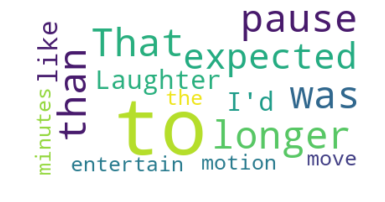

In [153]:
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

Let's do it for the whole Greenspan interjections

In [154]:
text_aux = " ".join(interjection for interjection in Greenspan_text.content)

In [157]:
len(text_aux)

3543653

In [160]:
wordcloudG = WordCloud(background_color='white', font_step = 3, relative_scaling=1).generate(text_aux)

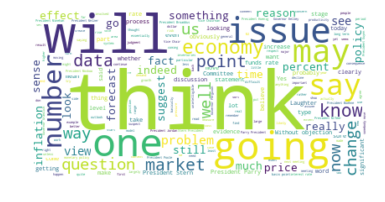

In [161]:
plt.imshow(wordcloudG, interpolation='bilinear')

plt.axis("off")

plt.show()

## a.5) LDA

### Tokenize

In [162]:
import nltk

In [166]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

In [169]:
tokens_example = tokenizer.tokenize(Greenspan_text['content'].loc[0])

In [170]:
Greenspan_text['content'].loc[0]

" That was a longer pause than I expected[Laughter] I'd like to entertain a motion to move the minutes"

In [171]:
tokens_example

['That',
 'was',
 'a',
 'longer',
 'pause',
 'than',
 'I',
 'expected',
 'Laughter',
 'I',
 'd',
 'like',
 'to',
 'entertain',
 'a',
 'motion',
 'to',
 'move',
 'the',
 'minutes']

### Remove Stop Words

In [180]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/jmo11/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [213]:
len(stopwords)

179

In [181]:
stopped_tokens = [i for i in tokens_example if not i in stopwords]

In [182]:
stopped_tokens

['That',
 'longer',
 'pause',
 'I',
 'expected',
 'Laughter',
 'I',
 'like',
 'entertain',
 'motion',
 'move',
 'minutes']

### Stems

In [183]:
from nltk.stem.porter import PorterStemmer

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [214]:
p_stemmer.*?

In [184]:
texts_G = [p_stemmer.stem(i) for i in stopped_tokens]

In [185]:
texts_G

['that',
 'longer',
 'paus',
 'I',
 'expect',
 'laughter',
 'I',
 'like',
 'entertain',
 'motion',
 'move',
 'minut']

### Loop to Tokenize, Remove Stop Words, Stem

In [194]:
texts = []

In [198]:
for i in range(0,len(Greenspan_text['content'])):

    tokens         = tokenizer.tokenize(Greenspan_text['content'].loc[i])
    
    stopped_tokens = [j for j in tokens if not j in stopwords]
    
    texts.append([p_stemmer.stem(j) for j in stopped_tokens])
    

In [218]:
Greenspan_text['content'].loc[1]

' If there are no objections, then theyare approved Mr Cross'

In [196]:
texts

[['that',
  'longer',
  'paus',
  'I',
  'expect',
  'laughter',
  'I',
  'like',
  'entertain',
  'motion',
  'move',
  'minut'],
 ['If', 'object', 'theyar', 'approv', 'Mr', 'cross'],
 ['comment', 'anyon']]

In [197]:
len(Greenspan_text['content'])

15927

### LDA

conda install -c anaconda gensim

In [203]:
import gensim

In [204]:
from gensim import corpora, models

dictionary = corpora.Dictionary(texts)

In [225]:
dictionary.*?

In [205]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [228]:
corpus[2]

[(17, 1), (18, 1)]

In [230]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)

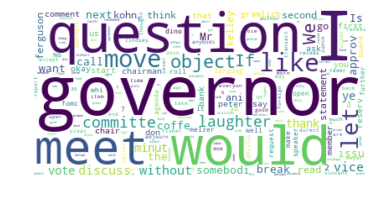

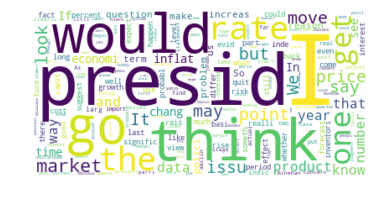

In [231]:
for t in range(2):

    plt.figure()
    
    plt.imshow(WordCloud(background_color='white').fit_words(dict(ldamodel.show_topic(t,200))),interpolation='bilinear')
    
    plt.axis('off')
    
    plt.show